# Wingin' it

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

## Example 1: non-parametric bootstrap

Want to get a bootstrap confidence interval for the mean of a normal distribution. 

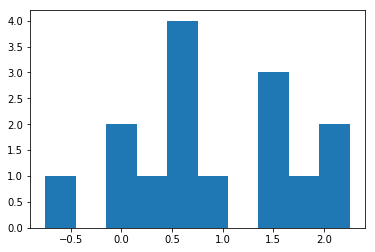

In [3]:
orig_sample = stats.norm.rvs(loc=1.1, scale=1, size=15)

plt.hist(orig_sample);

Step 1)  generate a bunch of bootstrap resamples

In [12]:
resample = np.random.choice(orig_sample, size=len(orig_sample), replace=True)
mean_resample = np.mean(resample)

In [13]:
mean_resample

1.3219742129738679

Step 2) compute (and save) the mean from each of those resamples

In [14]:
n_resamples = 10000
xbars = [] # empty list to keep track of our resamples

for _ in range(n_resamples):
    resample = np.random.choice(orig_sample, size=len(orig_sample), replace=True)
    mean_resample = np.mean(resample)
    xbars.append(mean_resample)

Step 3) compute our 90% bootstrap CI using the percentiles of our resampled means

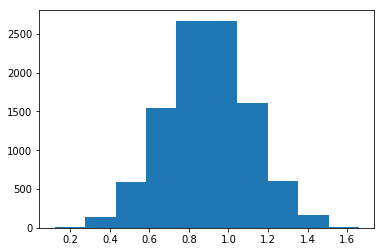

In [15]:
plt.hist(xbars);

In [16]:
CI = np.percentile(xbars, [5, 95])
print(CI)

[0.54267683 1.2482814 ]


<br> <br>

## Example 2: parametric bootstrap

Let's get a confidence interval for the median of a Poisson-distributed random variable (with rate 5)

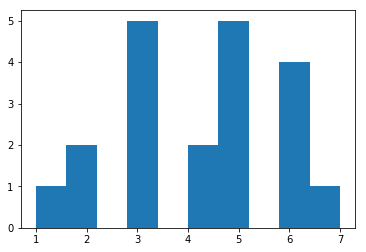

In [17]:
orig_sample = stats.poisson.rvs(size=20, mu=5)

plt.hist(orig_sample);

Step 1) estimate the parameter for our assumed distribution, using the OG sample

In [18]:
lambda_hat = np.mean(orig_sample)
print(lambda_hat)

4.2


In [19]:
n_resamples = 10000
meds = [] # empty list to keep track of our resamples

for _ in range(n_resamples):
#    resample = np.random.choice(orig_sample, size=len(orig_sample), replace=True)
    resample = stats.poisson.rvs(size=len(orig_sample), mu=lambda_hat)
    med_resample = np.median(resample)
    meds.append(med_resample)

(array([5.000e+00, 2.800e+01, 1.147e+03, 1.091e+03, 5.053e+03, 1.188e+03,
        1.364e+03, 8.500e+01, 3.800e+01, 1.000e+00]),
 array([2.  , 2.45, 2.9 , 3.35, 3.8 , 4.25, 4.7 , 5.15, 5.6 , 6.05, 6.5 ]),
 <a list of 10 Patch objects>)

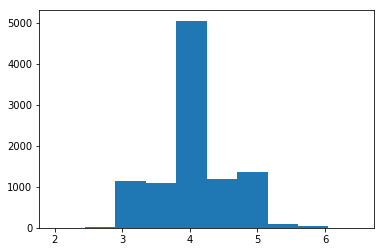

In [20]:
plt.hist(meds)

In [21]:
# 90% CI for the median
CI = np.percentile(meds, [5,95])
print(CI)

[3. 5.]
